**recsys-cluster-loss**

Example of cluster analysis in the context of recommendation systems.
Users who receive recommendations will be grouped based on the individual fairness measure of those recommendations.
The objective is to analyze whether there is any type of injustice of non-obvious user groups, that is, groups that cannot be configured based on some explicit user characteristic (variable) (for example: gender, age, etc.) .

Two methods of grouping will be applied:
1. Hierarchical clustering (tree clustering - dendrogram)
2. Non-hierarchical grouping by breakdown (grouping by k-Means)

In this file we are analyzing the possible groupings considering the following variable(s):
- age: age of users
- NA: number of evaluations performed for available items
- SPI: sum of the price of the items evaluated
- MA: average of item evaluation values
- MR: average of item recommendation values

Recommendation system: generating the recommendation matrix and calculating individual fairness

In [3]:
# cloning repository with database
!rm -rf recsys-cluster-loss
!git clone https://github.com/ravarmes/recsys-cluster-loss.git

Cloning into 'recsys-cluster-loss'...


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [5]:
import sys
sys.path.append('recsys-cluster-loss/src')
from RecSys import RecSys
from UserFairness import IndividualLossVariance

In [6]:
# reading data from a base with 20 movies and 40 users
Data_path = 'recsys-cluster-loss/data/MovieLens-Small'
n_users=  40
n_items= 20
top_users = False # True: to use users with more ratings; False: otherwise
top_items = False # True: to use movies with more ratings; False: otherwise

In [7]:
# recommendation algorithm
algorithm = 'RecSysExampleAntidoteData20Items'

In [8]:
# parameters for calculating fairness measures
l = 5
theta = 3
k = 3

In [9]:
recsys = RecSys(n_users, n_items, top_users, top_items, l, theta, k)

In [10]:
X, users_info, items_info = recsys.read_movielens_small(n_users, n_items, top_users, top_items, Data_path) # returns matrix of ratings with n_users rows and n_moveis columns
omega = ~X.isnull() # matrix X with True in cells with evaluations and False in cells not rated

In [11]:
users_info

,Gender,Age,NA,SPI,MA,MR
1,M,20,12,530,2.08,2.38
2,F,24,12,570,3.00,2.75
3,M,30,11,600,3.18,2.89
4,F,17,10,550,2.50,2.90
5,M,51,10,500,3.60,3.20
6,F,47,10,550,2.70,3.30
7,M,41,10,500,2.50,2.70
8,F,38,10,550,3.30,2.60
9,M,21,10,500,3.40,3.20
10,F,18,10,550,3.00,2.80


In [12]:
X_est = recsys.compute_X_est(X, algorithm, Data_path) # RecSysALS or RecSysKNN or RecSysNMF or RecSysExampleAntidoteData20Items

In [13]:
ilv = IndividualLossVariance(X, omega, 1)
losses = ilv.get_losses(X_est)

In [14]:
df = pd.DataFrame(columns=['Gender', 'Age', 'NA', 'SPI', 'MA', 'MR', 'Loss'])
df['Loss'] = losses
df['Gender'] = users_info['Gender']
df['Age'] = users_info['Age']
df['NA'] = users_info['NA']
df['SPI'] = users_info['SPI']
df['MA'] = users_info['MA']
df['MR'] = users_info['MR']

df

,Gender,Age,NA,SPI,MA,MR,Loss
UserID,,,,,,,
1,M,20,12,530,2.08,2.38,1.000000
2,F,24,12,570,3.00,2.75,0.666667
3,M,30,11,600,3.18,2.89,4.181818
4,F,17,10,550,2.50,2.90,1.600000
5,M,51,10,500,3.60,3.20,3.900000
6,F,47,10,550,2.70,3.30,1.200000
7,M,41,10,500,2.50,2.70,1.800000
8,F,38,10,550,3.30,2.60,3.300000
9,M,21,10,500,3.40,3.20,3.400000


In [15]:
df.head()

,Gender,Age,NA,SPI,MA,MR,Loss
UserID,,,,,,,
1,M,20,12,530,2.08,2.38,1.000000
2,F,24,12,570,3.00,2.75,0.666667
3,M,30,11,600,3.18,2.89,4.181818
4,F,17,10,550,2.50,2.90,1.600000
5,M,51,10,500,3.60,3.20,3.900000


In [16]:
# number of rows and columns:
df.shape

(40, 7)

In [17]:
# descriptive statistics:
df.describe()

,Age,NA,SPI,MA,MR,Loss
count,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,34.600000,10.125000,528.750000,3.01650,2.963000,3.801212
std,14.416515,0.463404,27.844578,0.42208,0.480231,1.823799
min,13.000000,10.000000,500.000000,2.08000,2.000000,0.666667
25%,22.000000,10.000000,500.000000,2.70000,2.600000,2.275000
50%,31.500000,10.000000,550.000000,3.00000,2.950000,3.900000
75%,43.250000,10.000000,550.000000,3.30000,3.300000,5.300000
max,69.000000,12.000000,600.000000,3.90000,4.000000,7.600000


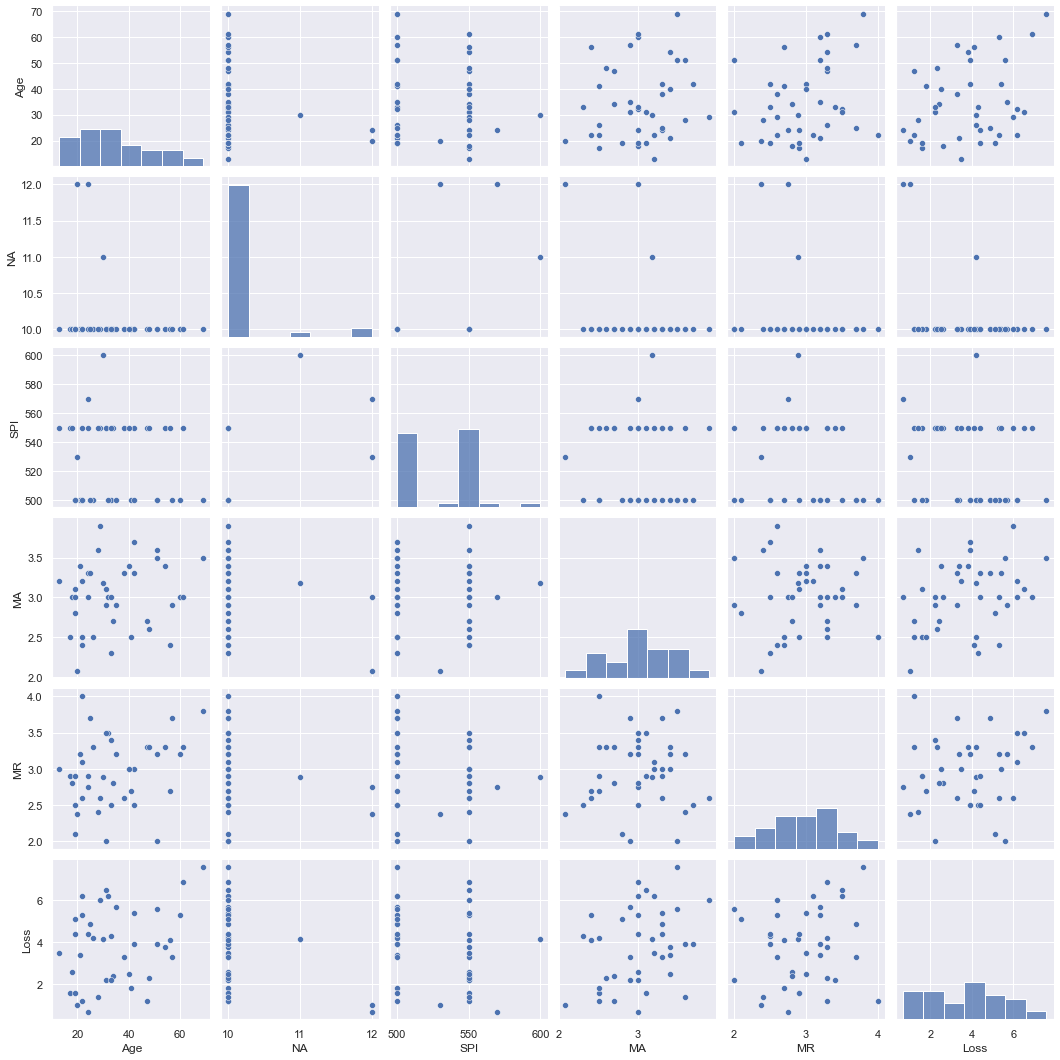

In [18]:
sns.pairplot(df)

<AxesSubplot:>

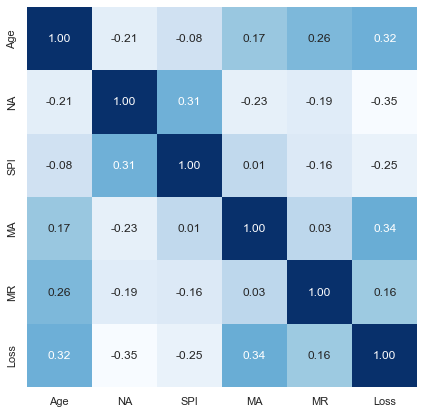

In [19]:
df2 = df.drop('Gender', 1) # eliminating the gender (non-numeric) column to analyze correlations

plt.figure(figsize=(7, 7))
corr = np.corrcoef(df2.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df2.columns, yticklabels=df2.columns)

Hierarchical clustering (tree clustering - dendrogram)

In [20]:
# Leaving only the Age, NA, SPI, MA and MR columns to perform cluster analysis
df2 = df2.drop('Loss', 1) 
#df2 = df2.drop('Age', 1) 
#df2 = df2.drop('NA', 1) 
#df2 = df2.drop('SPI', 1) 
#df2 = df2.drop('MA', 1) 
#df2 = df2.drop('MR', 1) 

In [21]:
df_scaled = df2.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df2)

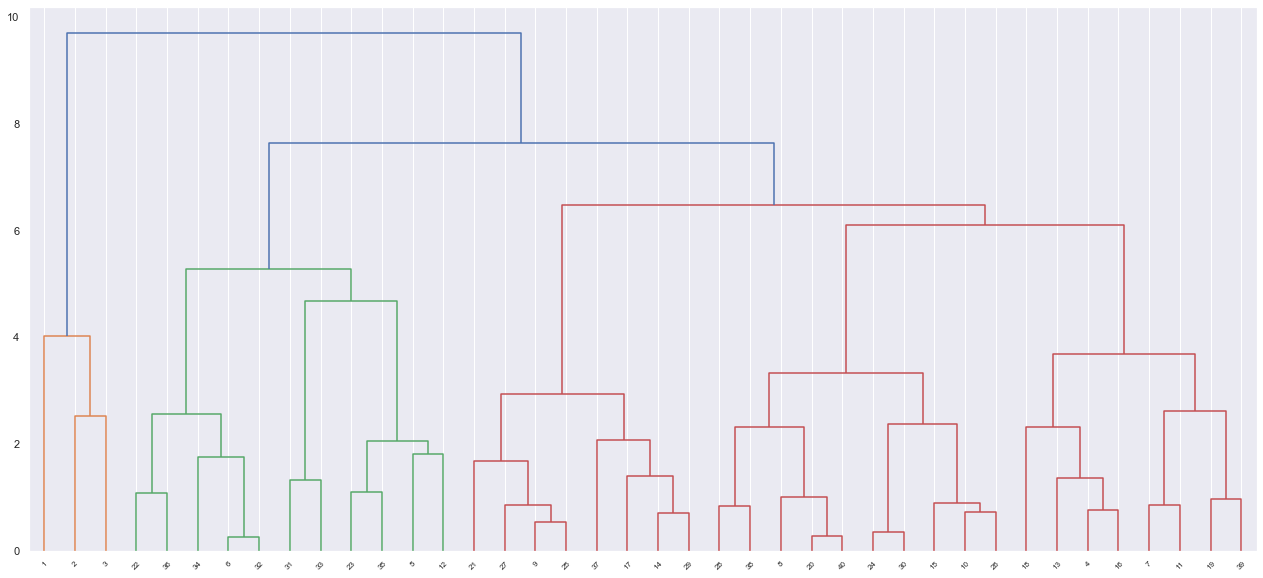

In [22]:
Z = hierarchy.linkage(df_scaled, 'ward') #complete or ward
plt.figure(figsize=(22, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

In [23]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
groups = cluster.fit_predict(df2)

In [24]:
groups

array([0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0], dtype=int64)

In [36]:
# descriptive statistics of groups
df_groups = df2.copy()
df_groups["clusters"] = cluster.labels_
df_group = df_groups.groupby("clusters")
df_group.describe()

Age                                                        NA  \
         count       mean        std   min   25%   50%   75%   max count   
clusters                                                                   
0         22.0  33.636364  13.297137  13.0  24.0  31.0  41.5  61.0  22.0   
1         13.0  27.384615   8.301992  19.0  21.0  25.0  33.0  42.0  13.0   
2          5.0  57.600000   7.469940  51.0  51.0  57.0  60.0  69.0   5.0   

                     ...   MA         MR                                  \
               mean  ...  75%  max count      mean       std  min    25%   
clusters             ...                                                   
0         10.227273  ...  3.3  3.9  22.0  2.882727  0.375210  2.0  2.625   
1         10.000000  ...  3.2  3.7  13.0  3.015385  0.545964  2.1  2.500   
2         10.000000  ...  3.5  3.6   5.0  3.180000  0.715542  2.0  3.200   

                             
            50%    75%  max  
clusters                     
0         2.895  3.225  3.5  
1         3.100  3.300  4.0  
2         3.200  3.700  3.8  

[3 rows x 40 columns]

In [25]:
users = list(df2.index)
grouped_users = {i: [] for i in range(n_clusters)}
for user, group in zip(users, groups):
    grouped_users[group].append(user)

for gp, ctr in grouped_users.items():
    print(f'Cluster {gp}: {ctr}')

Cluster 0: [1, 2, 3, 4, 6, 8, 10, 13, 15, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40]
Cluster 1: [7, 9, 11, 14, 17, 19, 21, 25, 27, 29, 31, 37, 39]
Cluster 2: [5, 12, 23, 33, 35]


Non-hierarchical grouping (K-means)

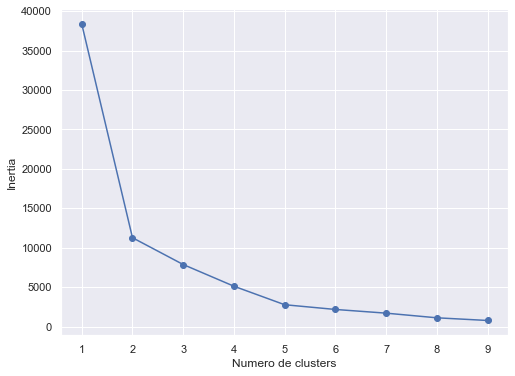

In [26]:
inertias = []
for k in np.arange(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    inertias.append(kmeans.inertia_)

# plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

In [37]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled)

In [28]:
df_scaled

,Age,NA,SPI,MA,MR,cluster
UserID,,,,,,
1,-1.025629,4.097688,0.045464,-2.247039,-1.229465,2
2,-0.744635,4.097688,1.500310,-0.039590,-0.449187,2
3,-0.323143,1.912254,2.591445,0.392302,-0.153947,2
4,-1.236375,-0.273179,0.772887,-1.239291,-0.132858,1
5,1.152076,-0.273179,-1.045671,1.400051,0.499800,0
6,0.871082,-0.273179,0.772887,-0.759411,0.710686,0
7,0.449591,-0.273179,-1.045671,-1.239291,-0.554630,0
8,0.238845,-0.273179,0.772887,0.680230,-0.765516,1
9,-0.955380,-0.273179,-1.045671,0.920170,0.499800,1


In [29]:
users = list(df_scaled.index)
groups = df_scaled['cluster']

grouped_users = {i: [] for i in range(n_clusters)}

for user, group in zip(users, groups):
    grouped_users[group].append(user)

for gp, ctr in grouped_users.items():
    print(f'Cluster {gp}: {ctr}')

Cluster 0: [5, 6, 7, 12, 14, 17, 20, 21, 22, 23, 24, 29, 30, 32, 34, 35, 36, 37]
Cluster 1: [4, 8, 9, 10, 11, 13, 15, 16, 18, 19, 25, 26, 27, 28, 31, 33, 38, 39, 40]
Cluster 2: [1, 2, 3]


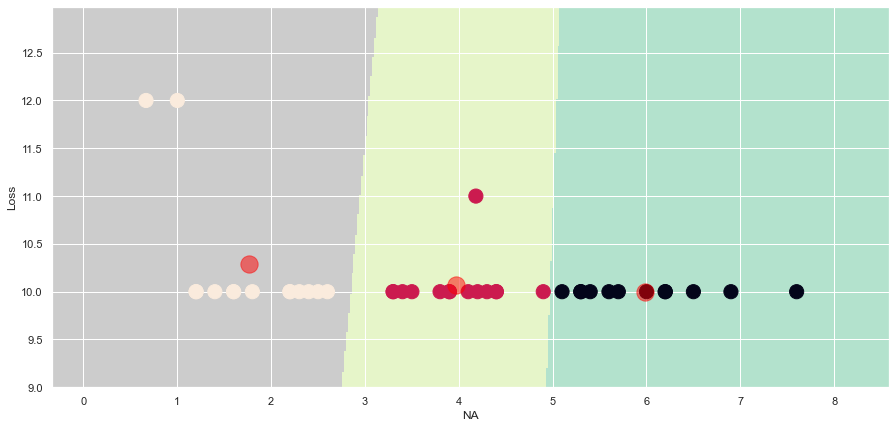

In [30]:
# Visualizando os grupos criados e seus centroides:
X2 = df[['Loss' , 'NA']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Loss' , y = 'NA' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Loss') , plt.xlabel('NA')
plt.show()

In [ ]:
# Visualizando os grupos criados e seus centroides:
X3 = df[['Loss' , 'NA', 'SPI']].iloc[: , :].values

algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X3)

labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X3[:, 0].min() - 1, X3[:, 0].max() + 1
y_min, y_max = X3[:, 1].min() - 1, X3[:, 1].max() + 1
z_min, z_max = X3[:, 2].min() - 1, X3[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h), np.arange(z_min, z_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z3 = Z.reshape(xx.shape)
plt.imshow(Z3 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max(), zz.min(), zz.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Loss' , y = 'NA' , z = 'SPI' , data = df , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , z =  centroids2[: , 2] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Loss') , plt.xlabel('NA'), plt.xlabel('SPI')
plt.show()

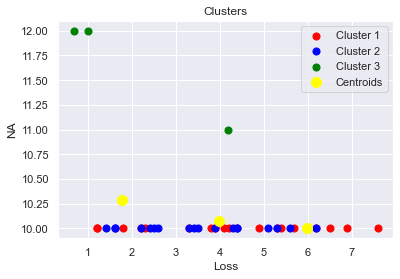

In [41]:
# visualising the clusters
X = df[['Loss' , 'NA']].iloc[: , :].values
kmeans = (KMeans(n_clusters = 3))
kmeans.fit(X)

plt.scatter(X[groups == 0, 0], X[groups == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[groups == 1, 0], X[groups == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[groups == 2, 0], X[groups == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Loss')
plt.ylabel('NA')
plt.legend()
plt.show()

In [43]:
df

,Gender,Age,NA,SPI,MA,MR,Loss
UserID,,,,,,,
1,M,20,12,530,2.08,2.38,1.000000
2,F,24,12,570,3.00,2.75,0.666667
3,M,30,11,600,3.18,2.89,4.181818
4,F,17,10,550,2.50,2.90,1.600000
5,M,51,10,500,3.60,3.20,3.900000
6,F,47,10,550,2.70,3.30,1.200000
7,M,41,10,500,2.50,2.70,1.800000
8,F,38,10,550,3.30,2.60,3.300000
9,M,21,10,500,3.40,3.20,3.400000
